In [1]:
# 경고 메시지 무시
import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import zipfile
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from datetime import datetime, date, time
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

plt.rc('font', family='malgun gothic')    # 한글처리
plt.rcParams['axes.unicode_minus']=False  # '- 표시

In [4]:
import networkx as nx

# 그래프 생성
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)

# 그래프를 GML 파일로 저장
nx.write_gml(G, "data/example.gml")  

## Graph Modeling Language, 그래프 구조를 텍스트로 표현

[('1', '2'), ('2', '3'), ('3', '4')]


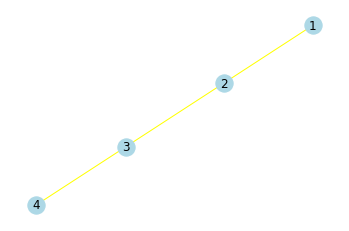

In [5]:
# GML 파일을 읽어와서 그래프 생성
G = nx.read_gml("data/example.gml")

print(G.edges())

plt.axis('off')
nx.draw_networkx(G, with_labels=True, node_color='lightblue', 
                                                         edge_color='yellow')

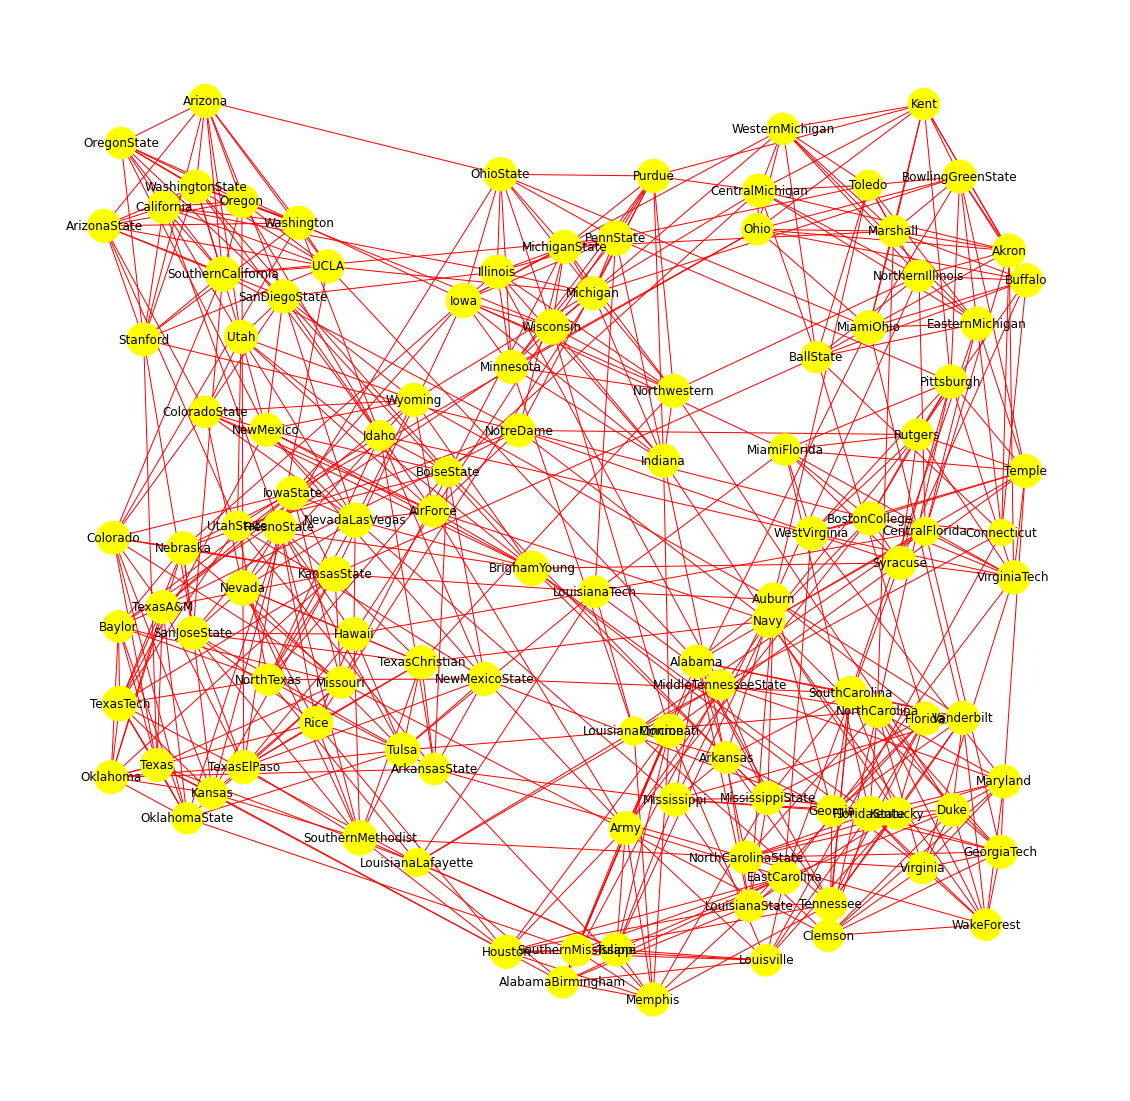

In [7]:
## 미국 대학교 풋볼 팀의 대전 빈도

zf = zipfile.ZipFile('data/football.zip')   ## zip파일 열기

# txt = zf.read('football.txt').decode()
gml = zf.read('football.gml').decode()  ## 텍스트로 디코딩
gml = gml.split('\n')[1:]    ## 엔터 기준으로 분할하여 리스트로 저장(0번줄 제외)
G = nx.parse_gml(gml)    ## gml형식의 텍스트를 파싱하여 G생성

plt.figure(figsize=(20, 20))
plt.axis('off')

degree = [d for n, d in G.degree()]
nx.draw_networkx(G, with_labels=True, node_size=[n*100 for n in degree], 
                                    node_color='yellow',  edge_color='red')

In [8]:
degrees = G.degree()
max_degree_node = max(degrees, key=lambda x: x[1])
min_degree_node = min(degrees, key=lambda x: x[1])

print(f"가장 많은 엣지를 가진 노드 : {max_degree_node[0]}")
print(f"엣지 수 : {max_degree_node[1]}")    

print(f"가장 적은 엣지를 가진 노드 : {min_degree_node[0]}")
print(f"엣지 수 : {min_degree_node[1]}")      

print('No. of nodes: %d' % G.number_of_nodes())
print('No. of edges: %d' % G.number_of_edges())
print('Avg. of degrees: %.1f' % np.mean([d for n, d in G.degree()]))


가장 많은 엣지를 가진 노드 : BrighamYoung
엣지 수 : 12
가장 적은 엣지를 가진 노드 : Connecticut
엣지 수 : 7
No. of nodes: 115
No. of edges: 613
Avg. of degrees: 10.7


###### 컴포넌트

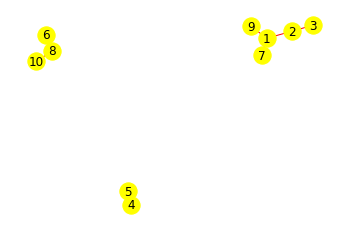

In [9]:
# 네트워크 생성
G = nx.Graph()

# 네트워크에 노드 추가
G.add_nodes_from([1, 2, 3, 4, 5,6,7,8,9,10])

# 네트워크에 엣지 추가
G.add_edges_from([(1, 2), (2, 3), (4, 5), (1,7),(1,9),(6,8),(8,10)])


plt.axis('off')
nx.draw_networkx(G, with_labels=True, node_color='yellow', edge_color='red')

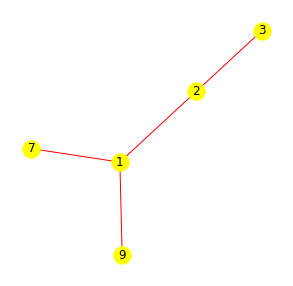

In [10]:
ksub = (G.subgraph(c) for c in nx.connected_components(G))
klist = list(ksub)

plt.figure(figsize=(5, 5))
plt.axis('off')
nx.draw_networkx(klist[0], with_labels=True, node_color='yellow', edge_color='red')

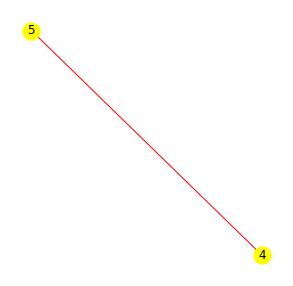

In [11]:
plt.figure(figsize=(5, 5))
plt.axis('off')
nx.draw_networkx(klist[1], with_labels=True, node_color='yellow', edge_color='red')

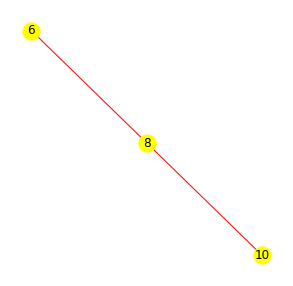

In [12]:
plt.figure(figsize=(5, 5))
plt.axis('off')
nx.draw_networkx(klist[2], with_labels=True, node_color='yellow', edge_color='red')

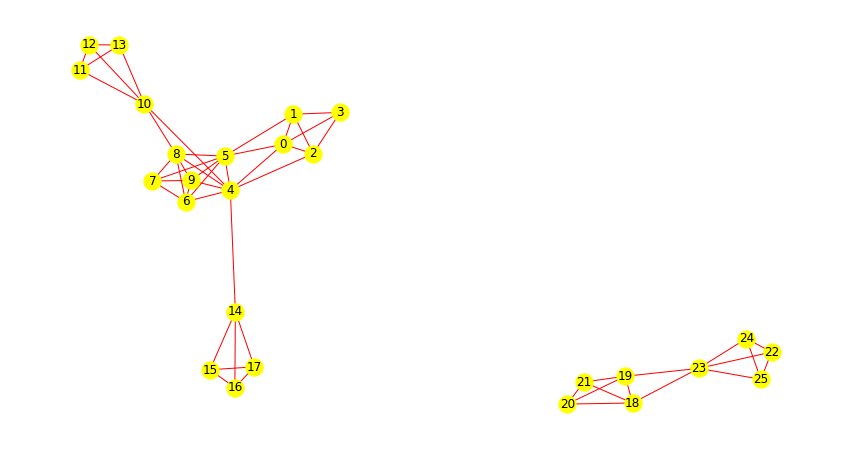

In [15]:
K = np.loadtxt("data/social.csv", delimiter=",")
G = nx.to_networkx_graph(K)

plt.figure(figsize=(15,8))
plt.axis('off')
nx.draw_networkx(G, with_labels=True, node_color='yellow', edge_color='red')

In [16]:
degrees = G.degree()
max_degree_node = max(degrees, key=lambda x: x[1])
min_degree_node = min(degrees, key=lambda x: x[1])

print(f"가장 많은 엣지를 가진 노드 : {max_degree_node[0]}")
print(f"엣지 수 : {max_degree_node[1]}")    

print(f"가장 적은 엣지를 가진 노드 : {min_degree_node[0]}")
print(f"엣지 수 : {min_degree_node[1]}")      

print('No. of nodes: %d' % G.number_of_nodes())
print('No. of edges: %d' % G.number_of_edges())
print('Avg. of degrees: %.1f' % np.mean([d for n, d in G.degree()]))


가장 많은 엣지를 가진 노드 : 4
엣지 수 : 8
가장 적은 엣지를 가진 노드 : 3
엣지 수 : 3
No. of nodes: 26
No. of edges: 53
Avg. of degrees: 4.1


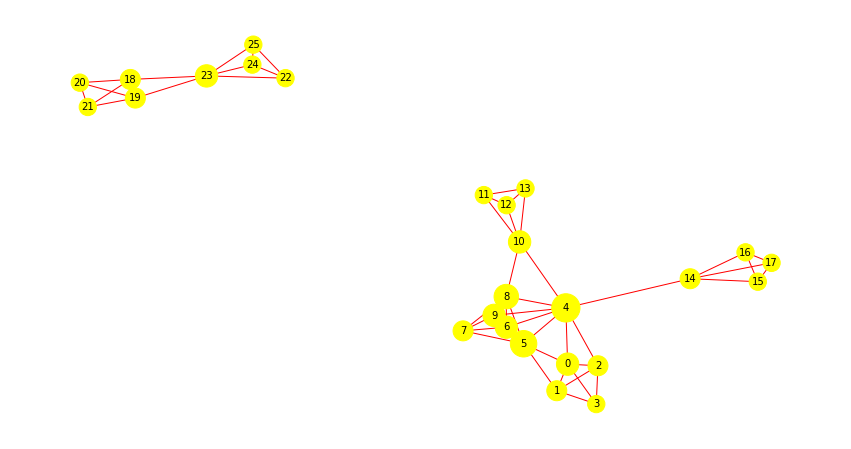

In [18]:
degree = [d for n, d in G.degree()]

plt.figure(figsize=(15,8))
plt.axis('off')
nx.draw_networkx(G, with_labels=True, font_size=10,node_size=[n*100 for n in degree], 
                                     node_color='yellow',  edge_color='red')

In [19]:
ksub = (G.subgraph(c) for c in nx.connected_components(G))
klist = list(ksub)
print(len(klist))

2


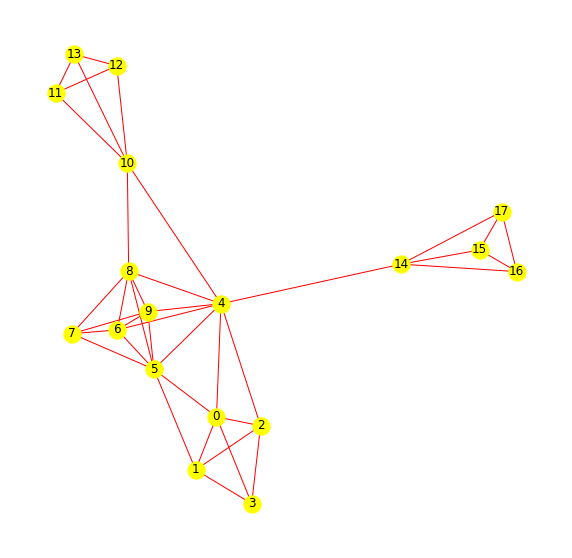

In [20]:
plt.figure(figsize=(10, 10))
plt.axis('off')
nx.draw_networkx(klist[0], with_labels=True, node_color='yellow', edge_color='red')

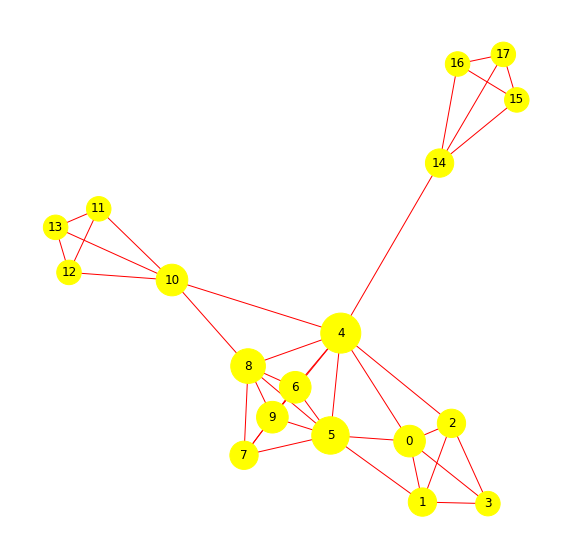

In [21]:
degree = [d for n, d in klist[0].degree()]

plt.figure(figsize=(10, 10))
plt.axis('off')
nx.draw_networkx(klist[0], with_labels=True, node_color='yellow', 
                         edge_color='red', node_size=[d * 200 for d in degree])
plt.show()

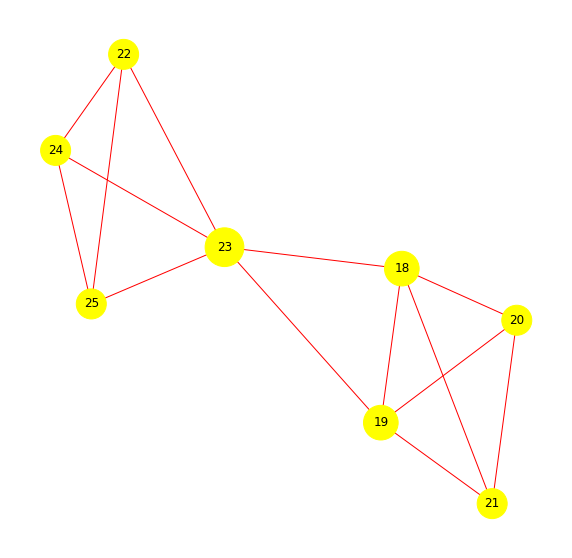

In [24]:
degree = [d for n, d in klist[1].degree()]

plt.figure(figsize=(10, 10))
plt.axis('off')
nx.draw_networkx(klist[1], with_labels=True, node_color='yellow', 
                         edge_color='red', node_size=[d * 300 for d in degree])

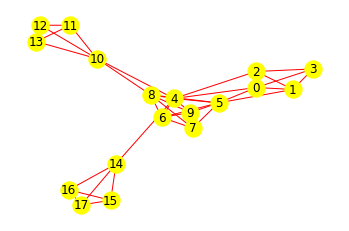

In [25]:
## 노드 수가 가장 많은 컴포넌트
maxG = max((G.subgraph(c) for c in nx.connected_components(G)), key=len)  ## 노드 수가 가장 많은 컴포넌트

plt.axis('off')
nx.draw_networkx(maxG, with_labels=True, node_color='yellow', edge_color='red')

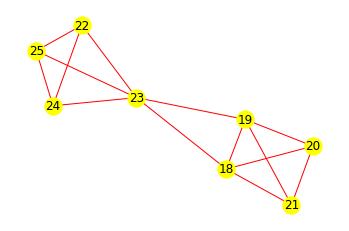

In [26]:
## 노드 수가 가장 적은 컴포넌트
minG = min((G.subgraph(c) for c in nx.connected_components(G)), key=len)

plt.axis('off')
nx.draw_networkx(minG, with_labels=True, node_color='yellow', edge_color='red')